In [1]:
1+1

2

In [16]:
import numpy as np # linear algebra
import pandas as pd # df processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

import os
os.chdir("C:\\Users\\hp\\Desktop\\locker\\imarticus\\Project\\nyc taxi fare")

In [5]:
df = pd.read_csv('NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [6]:
df.tail()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1
119999,2010-04-17 16:00:14 UTC,5.3,0,-73.955415,40.771920,-73.967623,40.763015,3


EDA 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [8]:
df.describe()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,10.040326,0.333333,-73.976626,40.751443,-73.974501,40.751695,1.347167
std,7.500134,0.471406,0.031497,0.025821,0.032419,0.030279,0.759263
min,2.500000,0.000000,-74.465447,40.121653,-74.443323,40.164927,1.000000
25%,5.700000,0.000000,-73.992386,40.736594,-73.991478,40.735914,1.000000
50%,7.700000,0.000000,-73.982084,40.753661,-73.980411,40.754441,1.000000
75%,11.300000,1.000000,-73.968710,40.768020,-73.965500,40.768880,1.000000
max,49.900000,1.000000,-73.311845,40.981292,-73.496140,40.993498,5.000000


In [9]:
df.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df["fare_class"].value_counts()

0    80000
1    40000
Name: fare_class, dtype: int64

In [14]:
print("Fare amount greater than $10 :" , df[df["fare_amount"] >= 10 ].shape[0])

df[df["fare_amount"] >= 10]

Fare amount greater than $10 : 40000


,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1
12,2010-04-23 12:12:08 UTC,17.3,1,-73.997107,40.722116,-73.976628,40.775252,1
16,2010-04-15 21:54:26 UTC,14.1,1,-74.002233,40.734468,-73.961872,40.764459,2
20,2010-04-20 11:27:29 UTC,36.0,1,-73.874537,40.774075,-73.985187,40.760783,1
...,...,...,...,...,...,...,...,...
119989,2010-04-17 19:19:19 UTC,11.7,1,-74.001573,40.727515,-73.967402,40.763441,1
119991,2010-04-12 16:43:37 UTC,11.3,1,-73.975583,40.760748,-73.984528,40.742072,1
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1


In [17]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [18]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [23]:
from math import radians, cos,sin, asin,sqrt
def distance(lon1, lon2, lat1 , lat2):
    
    
    lon1 =radians(lon1)
    lon2 =radians(lon2)
    lat1 =radians(lat1)
    lat2 =radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371
    return(round (c * r, 2))

In [24]:
d = []
for i in range(df.shape[0]):
    d.append(distance(df["pickup_latitude"][i],
                      df["dropoff_latitude"][i],
                      df["pickup_longitude"][i],
                      df["dropoff_longitude"][i]))

In [25]:
df["distance in kms"] = d
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance in kms
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,1.93
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.77
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.82
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2.16
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,9.46


In [26]:
df.drop(["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"], axis=1, inplace=True)
df.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,distance in kms
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46


In [27]:
print("Date in df : ", df["pickup_datetime"].dt.day.sort_values().unique())
print("Month in df : ", df["pickup_datetime"].dt.month.unique()[0])
print("Year in df : ", df["pickup_datetime"].dt.year.unique()[0])

Date in df :  [11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
Month in df :  4
Year in df :  2010


In [29]:
week_names = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

df["weekday_name"] = df["pickup_datetime"].dt.weekday.map(week_names)
df.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,distance in kms,weekday_name
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93,Sunday
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77,Friday
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82,Friday
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16,Saturday
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46,Friday


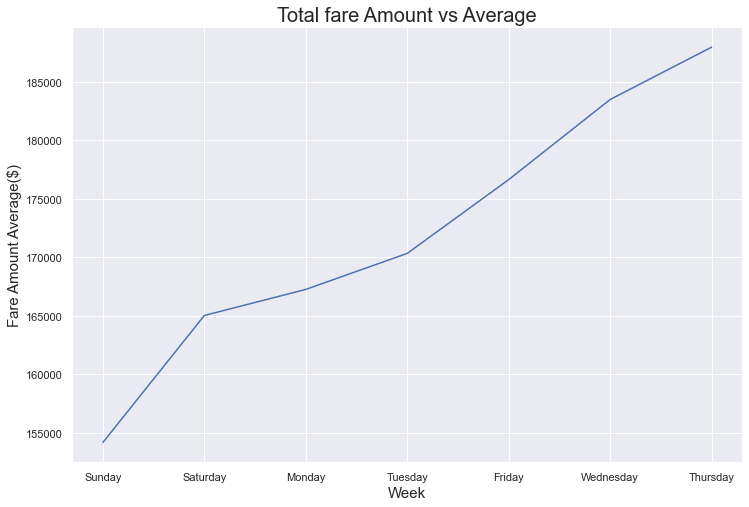

In [30]:
plt.figure(figsize = (12,8))
df.groupby("weekday_name")["fare_amount"].sum().sort_values().plot()

plt.xlabel("Week", fontsize=15)
plt.ylabel("Fare Amount Average($)", fontsize=15)
plt.title("Total fare Amount vs Average", fontsize=20)
plt.show()

In [31]:
week_names_encode = {"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}
df["weekday_name"] = df["weekday_name"].map(week_names_encode)
df.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,distance in kms,weekday_name
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93,1
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77,5
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82,5
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16,2
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46,5


In [32]:
df["Hour"] = df["pickup_datetime"].dt.hour
df["Hour"].unique()

array([ 8, 15, 11, 21,  2, 19,  9, 18, 22, 17, 12, 10, 23,  1, 13, 16, 14,
        0, 20,  3,  7,  4,  6,  5], dtype=int64)

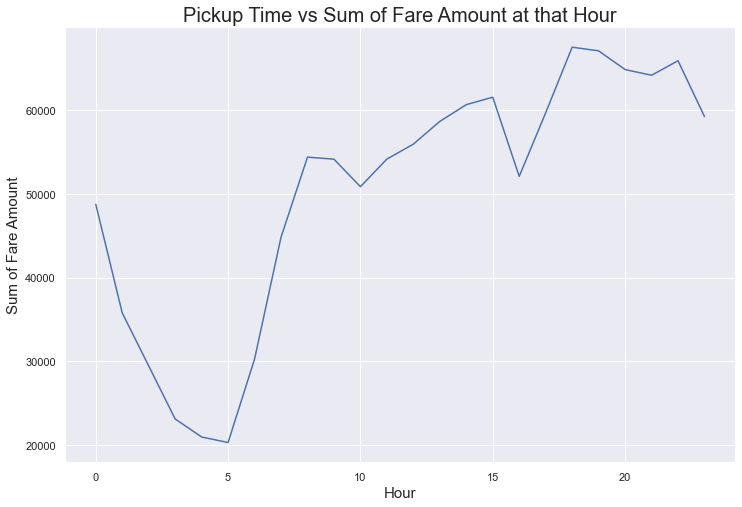

In [33]:
plt.figure(figsize = (12,8))

df.groupby("Hour")["fare_amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that Hour", fontsize=20)
plt.xlabel("Hour", fontsize=15)
plt.ylabel("Sum of Fare Amount", fontsize=15)
plt.show()

In [34]:
df["Month_Day"] = df["pickup_datetime"].dt.day

In [35]:
for day in list(df["pickup_datetime"].dt.day.sort_values().unique()):
    print(f"Date : {day} \t Total fare Amount : ${round(df[df.pickup_datetime.dt.day==day].fare_amount.sum(), 2)}")

Date : 11 	 Total fare Amount : $64911.95
Date : 12 	 Total fare Amount : $77483.5
Date : 13 	 Total fare Amount : $84961.02
Date : 14 	 Total fare Amount : $85054.18
Date : 15 	 Total fare Amount : $91743.83
Date : 16 	 Total fare Amount : $94096.09
Date : 17 	 Total fare Amount : $87853.61
Date : 18 	 Total fare Amount : $82439.11
Date : 19 	 Total fare Amount : $76683.18
Date : 20 	 Total fare Amount : $82287.96
Date : 21 	 Total fare Amount : $85274.48
Date : 22 	 Total fare Amount : $91738.54
Date : 23 	 Total fare Amount : $93860.29
Date : 24 	 Total fare Amount : $88780.99
Date : 25 	 Total fare Amount : $17670.4


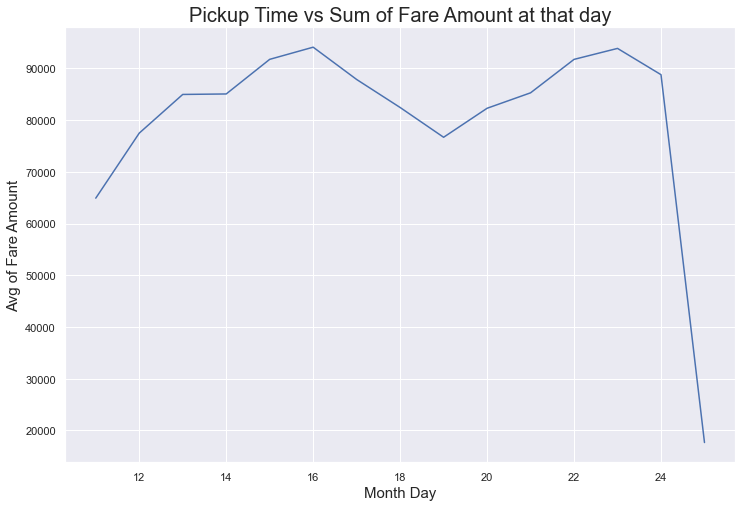

In [36]:
plt.figure(figsize = (12, 8))

df.groupby("Month_Day")["fare_amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that day", fontsize=20)
plt.xlabel("Month Day", fontsize=15)
plt.ylabel("Avg of Fare Amount", fontsize=15)
plt.show()

In [37]:
df["passenger_count"].value_counts()


1    92531
2    18650
3     4874
4     2518
5     1427
Name: passenger_count, dtype: int64

In [42]:
df["fare_class"].unique()


array([0, 1], dtype=int64)

In [43]:
df.groupby(["fare_class","passenger_count"])[["passenger_count"]].sum()

passenger_count
fare_class passenger_count                 
0          1                          62591
           2                          23588
           3                           9426
           4                           6288
           5                           4505
1          1                          29940
           2                          13712
           3                           5196
           4                           3784
           5                           2630

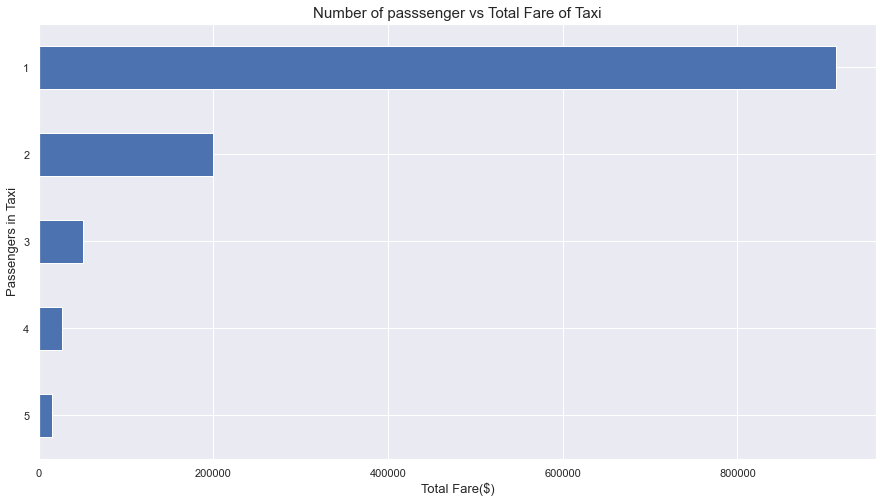

In [44]:
plt.figure(figsize=(15,8))
df.groupby("passenger_count")["fare_amount"].sum().sort_values().plot.barh()
plt.xlabel("Total Fare($)",fontsize =13)
plt.ylabel("Passengers in Taxi", fontsize =13)
plt.title("Number of passsenger vs Total Fare of Taxi", fontsize = 15)
plt.show()


In [45]:
df.drop("pickup_datetime", axis=1, inplace=True)

In [46]:
df.to_csv("df_transformed.csv", index=False)

df1 = pd.read_csv("df_transformed.csv")
df1.head()


,fare_amount,fare_class,passenger_count,distance in kms,weekday_name,Hour,Month_Day
0,6.5,0,1,1.93,1,8,19
1,6.9,0,1,1.77,5,15,17
2,10.1,1,2,3.82,5,11,17
3,8.9,0,1,2.16,2,21,11
4,19.7,1,1,9.46,5,2,17
